<a href="https://colab.research.google.com/github/Laureoby/Apps_cleaning/blob/update/Cleaning_App_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/apps.csv')
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [5]:
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
#We fill Nan values in rating column with 0 value
data['Rating'].fillna(0, inplace=True)
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [7]:
#Now we work on size column
data['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,
         2.4,  27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,
         8.2,   9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,
         3.5,   4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,
         0. ,   6.5,   1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,
         8.3,   4.3,   4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,
        61. ,  66. ,   0.1,   8.4,  44. ,   0.7,   1.6,   6.2,  53. ,
         1.4,   3. ,   5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,
         4.4,   4.8,

In [8]:
def nonlinear_interpolate(dataset, column_name, kind='nearest'):
    #collect Nan values index
    valid_index=dataset[column_name].dropna().index
    #create tab with right index and corresponding values
    x=valid_index
    y=dataset.loc[valid_index, column_name]
    #create tab with Nan values index
    nan_index=dataset[column_name].loc[dataset[column_name].isna()].index
    #doing interpolation for Nan index
    f=interp1d(x,y,kind=kind)
    dataset.loc[nan_index, column_name] = f(nan_index)

    return dataset

#called function
data = nonlinear_interpolate(data, 'Size', kind='nearest')
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9.5,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [10]:
#We will delete Nan values in Current Ver and Android Ver
data = data.dropna(subset=['Current Ver'])
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

In [11]:
data = data.dropna(subset=['Android Ver'])
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
#Now we verified format of column in dataset and arrange this
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [14]:
data['Price'] = data['Price'].str.replace('$',"")
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [15]:
#convert column values in float
def convert_column_to_float(dataset, column_name):
    if dataset[column_name].dtype == 'object':
        #dataset[column_name] = dataset[column_name].apply(lambda x: float(x) if x.replace('.',"").isdigit() else pd.np.nan)
        dataset[column_name] = dataset[column_name].astype(float)
    else:
        print(f"Column {column_name} is already in float type.")
    return dataset

#called function
data = convert_column_to_float(data, 'Price')
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [16]:
#category column
data['Category'] = data['Category'].str.lower()
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,art_and_design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,family,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,medical,0.0,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,9.5,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
#We just remove sign +
data['Installs'] = data['Installs'].str.replace('+',"")
data['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [18]:
#We just remove sign ,
data['Installs'] = data['Installs'].str.replace(',',"")
data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [19]:
data = convert_column_to_float(data, 'Installs')
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [20]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [21]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='mixed')

In [22]:
data['Last Updated'] = data['Last Updated'].dt.strftime('%Y-%m-%d')

In [23]:
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [24]:
data['Current Ver'].value_counts()

Current Ver
Varies with device    1055
1                      831
1.1                    271
1.2                    183
2                      163
                      ... 
20180517                 1
3.1.00                   1
2.1.54                   1
32.1                     1
2.0.148.0                1
Name: count, Length: 2769, dtype: int64

In [25]:
data['Current Ver'] = data['Current Ver'].str.replace('Varies with device','')
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [26]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [27]:
#replace and up with last android version
data['Android Ver'] = data['Android Ver'].str.replace('and up','14.0')

In [28]:
data['Android Ver'].unique()

array(['4.0.3 14.0', '4.2 14.0', '4.4 14.0', '2.3 14.0', '3.0 14.0',
       '4.1 14.0', '4.0 14.0', '2.3.3 14.0', 'Varies with device',
       '2.2 14.0', '5.0 14.0', '6.0 14.0', '1.6 14.0', '1.5 14.0',
       '2.1 14.0', '7.0 14.0', '5.1 14.0', '4.3 14.0', '4.0.3 - 7.1.1',
       '2.0 14.0', '3.2 14.0', '4.4W 14.0', '7.1 14.0', '7.0 - 7.1.1',
       '8.0 14.0', '5.0 - 8.0', '3.1 14.0', '2.0.1 14.0', '4.1 - 7.1.1',
       '5.0 - 6.0', '1.0 14.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [29]:
# function which extract max and min versions
def extract_versions(version):
    if 'Varies with device' in version:
        return np.nan, np.nan  # manage special cases
    if '-' in version:
        min_version, max_version = version.split('-')
        return min_version.strip(), max_version.strip()
    if 'and up' in version:
        min_version = version.split(' ')[0]
        return min_version, np.nan  # which not have max version
    return version, np.nan  # general cases for unknown format

# Applied function and create two new columns
data[['Android_min_ver', 'Android_max_ver']] = data['Android Ver'].apply(lambda x: pd.Series(extract_versions(x)))
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android_min_ver,Android_max_ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 14.0,4.0.3 14.0,NaN
1,1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,4.0.3 14.0,NaN
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 14.0,4.0.3 14.0,NaN
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,,4.2 14.0,4.2 14.0,NaN
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 14.0,4.4 14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,family,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 14.0,4.1 14.0,NaN
9655,10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1,4.1 14.0,4.1 14.0,NaN
9656,10838,Parkinson Exercices FR,medical,0.0,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 14.0,2.2 14.0,NaN
9657,10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,9.5,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,,Varies with device,NaN,NaN


In [30]:
data.isnull().sum()

Unnamed: 0            0
App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Android_min_ver     990
Android_max_ver    9640
dtype: int64

In [31]:
#We replace max ver android by the most recent version
data['Android_max_ver'].fillna(12, inplace=True)
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Android_min_ver    990
Android_max_ver      0
dtype: int64

In [32]:
data['Android_min_ver'].mode()

0    4.1 14.0
Name: Android_min_ver, dtype: object

In [33]:
#We replace Nan value in min ver android by mode
mode_value=data['Android_min_ver'].mode()[0]
data['Android_min_ver'].fillna(mode_value, inplace=True)
data.isnull().sum()

Unnamed: 0         0
App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Android_min_ver    0
Android_max_ver    0
dtype: int64

In [34]:
#We delete Android ver and unnamed columns
cols=['Android Ver', 'Unnamed: 0']
data = data.drop(cols, axis=1)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 14.0,12
1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,12
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 14.0,12
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,,4.2 14.0,12
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 14.0,12


In [35]:
df = pd.read_csv('/content/drive/MyDrive/user_reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [36]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [37]:
#We delete rows which contains Nan value
df = df.dropna()
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [38]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [39]:
#We mixed app and user review dataset
merged_data = pd.merge(data, df, on="App", how="inner")
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,12,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,12,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,12,like,Neutral,0.000,0.000000
3,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,12,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 14.0,12,I hate,Negative,-0.800,0.900000


In [40]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35929 entries, 0 to 35928
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     35929 non-null  object 
 1   Category                35929 non-null  object 
 2   Rating                  35929 non-null  float64
 3   Reviews                 35929 non-null  int64  
 4   Size                    35929 non-null  float64
 5   Installs                35929 non-null  float64
 6   Type                    35929 non-null  object 
 7   Price                   35929 non-null  float64
 8   Content Rating          35929 non-null  object 
 9   Genres                  35929 non-null  object 
 10  Last Updated            35929 non-null  object 
 11  Current Ver             35929 non-null  object 
 12  Android_min_ver         35929 non-null  object 
 13  Android_max_ver         35929 non-null  object 
 14  Translated_Review       35929 non-null

#**Preparing the dataset**

In [41]:
#We use labelencoder for column 'App', 'Genres', 'Translated_Review', 'Category'
from sklearn.preprocessing import LabelEncoder

# Dictionnaire pour stocker les encodeurs pour chaque colonne
encoders = {}

# Liste des colonnes à encoder
columns_to_encode = ['App', 'Genres', 'Translated_Review', 'Category']

# Encoder chaque colonne et stocker l'encodeur utilisé
for column in columns_to_encode:
    encoder = LabelEncoder()
    merged_data[column] = encoder.fit_transform(merged_data[column])
    encoders[column] = encoder

# Affichage des premières lignes du dataframe encodé
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,Free,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,324,Negative,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,Free,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,11865,Negative,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,Free,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,26194,Neutral,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,Free,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,9004,Positive,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,Free,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,8054,Negative,-0.800,0.900000


In [43]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [45]:
def encode_type_column(df):
    if 'Type' in df.columns:
        # Transformer les valeurs 'Free' en 1 et 'Paid' en 0
        df['Type'] = df['Type'].map({'Free': 0, 'Paid': 1})
    else:
        print("La colonne 'Type' n'existe pas dans le dataframe.")
    return df
# Appliquer la fonction et afficher le résultat
merged_data = encode_type_column(merged_data)
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,0,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,324,Negative,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,0,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,11865,Negative,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,0,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,26194,Neutral,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,0,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,9004,Positive,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,0,0.0,Everyone,6,2018-01-15,2.0.0,4.0.3 14.0,12,8054,Negative,-0.800,0.900000


In [46]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [47]:
# Création d'une instance de LabelEncoder
encoder = LabelEncoder()
# Appliquer LabelEncoder à la colonne et remplacer les données originales
merged_data['Content Rating'] = encoder.fit_transform(merged_data['Content Rating'])
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,324,Negative,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,11865,Negative,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,26194,Neutral,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,9004,Positive,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,8054,Negative,-0.800,0.900000


In [48]:
merged_data['Sentiment'].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [49]:
merged_data['Sentiment'] = merged_data['Sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral':0.5})
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,324,0.0,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,11865,0.0,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,26194,0.5,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,9004,1.0,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,2018-01-15,2.0.0,4.0.3 14.0,12,8054,0.0,-0.800,0.900000


Conversion des dates en timestamps Unix (nombre de secondes depuis le 1er janvier 1970). Cette méthode est utile pour représenter les dates comme une série continue de valeurs, ce qui permet de les corréler avec d'autres variables numériques.

In [50]:
# Conversion des dates en timestamp
merged_data['Last Updated'] = pd.to_datetime(merged_data['Last Updated']).astype(int) / 10**9  # Convertit en secondes
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,2.0.0,4.0.3 14.0,12,324,0.0,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,2.0.0,4.0.3 14.0,12,11865,0.0,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,2.0.0,4.0.3 14.0,12,26194,0.5,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,2.0.0,4.0.3 14.0,12,9004,1.0,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,2.0.0,4.0.3 14.0,12,8054,0.0,-0.800,0.900000


In [51]:
# Dictionnaire pour stocker les encodeurs pour chaque colonne
encoders = {}

# Liste des colonnes à encoder
columns_to_encode = ['Current Ver', 'Android_min_ver']

# Encoder chaque colonne et stocker l'encodeur utilisé
for column in columns_to_encode:
    encoder = LabelEncoder()
    merged_data[column] = encoder.fit_transform(merged_data[column])
    encoders[column] = encoder

# Affichage des premières lignes du dataframe encodé
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,12,324,0.0,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,12,11865,0.0,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,12,26194,0.5,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,12,9004,1.0,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,12,8054,0.0,-0.800,0.900000


In [52]:
merged_data['Android_max_ver'].unique()

array([12, '7.1.1', '8.0'], dtype=object)

In [53]:
merged_data['Android_max_ver'] = merged_data['Android_max_ver'].map({'12': 0, '7.1.1': 1, '8.0':2})
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,NaN,324,0.0,-0.250,1.000000
1,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,NaN,11865,0.0,-0.725,0.833333
2,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,NaN,26194,0.5,0.000,0.000000
3,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,NaN,9004,1.0,0.500,0.600000
4,356,0,3.9,967,14.0,500000.0,0,0.0,1,6,1.515974e+09,145,11,NaN,8054,0.0,-0.800,0.900000


In [54]:
merged_data['Android_max_ver'].fillna(0, inplace=True)
merged_data.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android_min_ver           0
Android_max_ver           0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

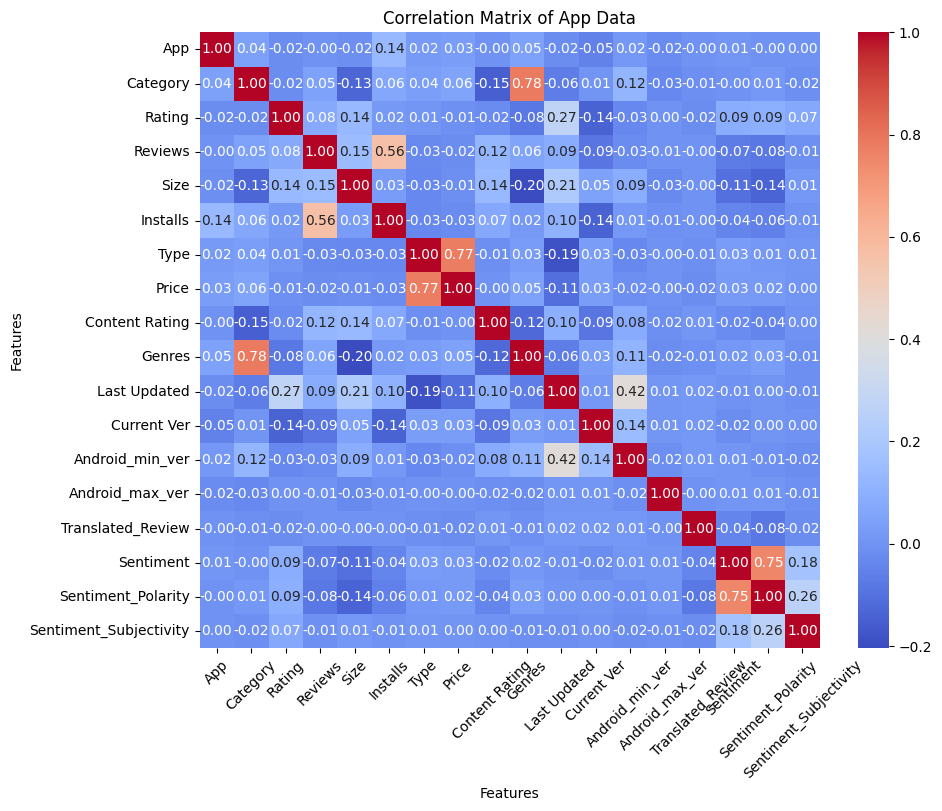

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = merged_data.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

# Add a title and labels
plt.title("Correlation Matrix of App Data")
plt.xlabel("Features")
plt.ylabel("Features")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()


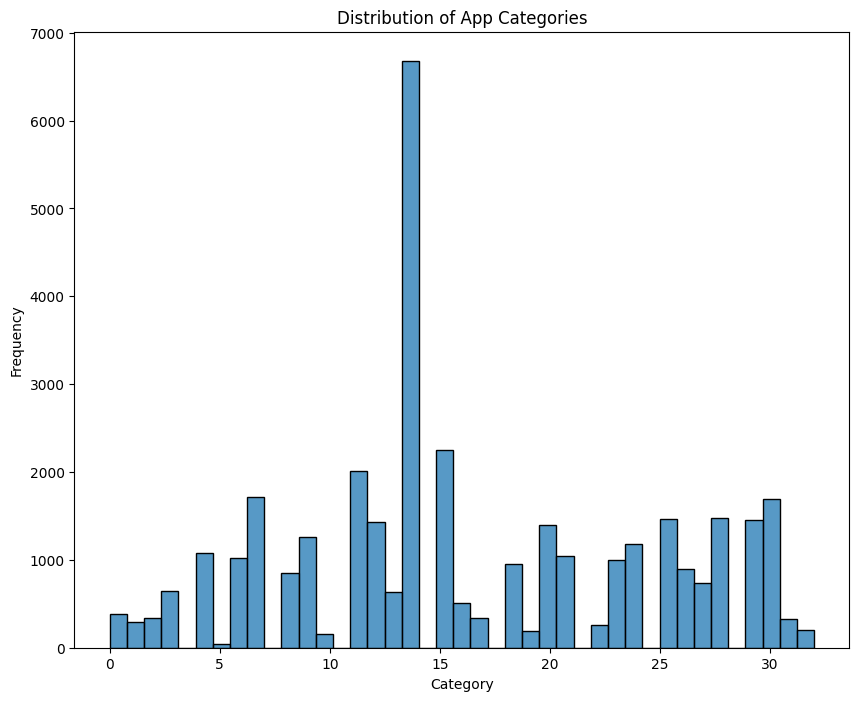

In [58]:
plt.figure(figsize=(10, 8))

# Create a histogram of the "Category" column
sns.histplot(data=merged_data, x="Category")

# Add a title and labels
plt.title("Distribution of App Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")

# Show the plot
plt.show()

#**Divide into train and test**

In [59]:
from sklearn.model_selection import train_test_split

# X will contain all columns except'VOTES'
X = merged_data.drop('Sentiment', axis=1)
# y will only contain the column 'VOTES'
y = merged_data['Sentiment']
# we divide dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Training set size:", y_train.shape)
print("Test set size:", y_test.shape)

Training set size: (28743, 17)
Test set size: (7186, 17)
Training set size: (28743,)
Test set size: (7186,)


In [61]:
from sklearn.linear_model import LinearRegression
#create one instance of model
model = LinearRegression()
#train model
model.fit(X_train, y_train)

LinearRegression()

In [62]:
#evaluate model
from sklearn.metrics import mean_squared_error, r2_score

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 0.07356093839276742
R²: 0.5696918400884992


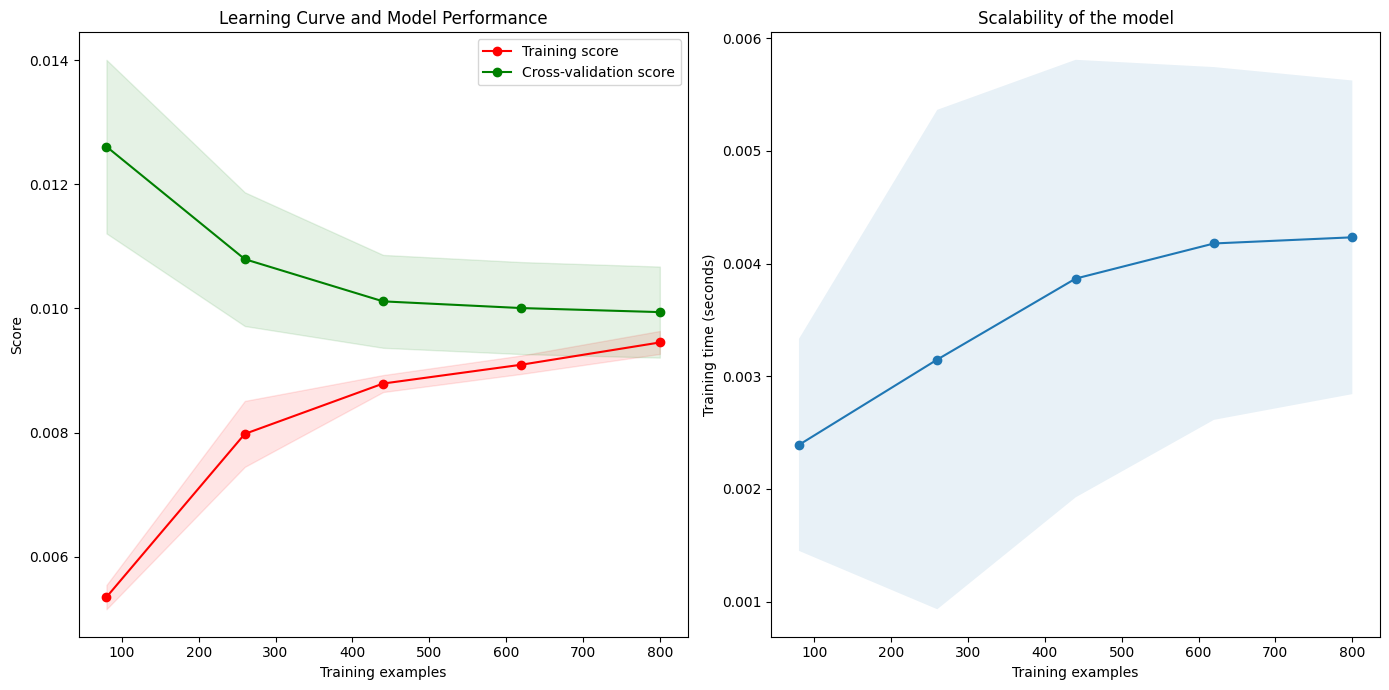

In [66]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Générer des données de régression synthétiques comme exemple
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Créer une instance du modèle
model = LinearRegression()

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='neg_mean_squared_error', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Fonction pour tracer les résultats
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

    plt.subplot(122)
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Training time (seconds)")

    plt.tight_layout()
    plt.show()

# Appeler la fonction d'affichage
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Learning Curve and Model Performance')

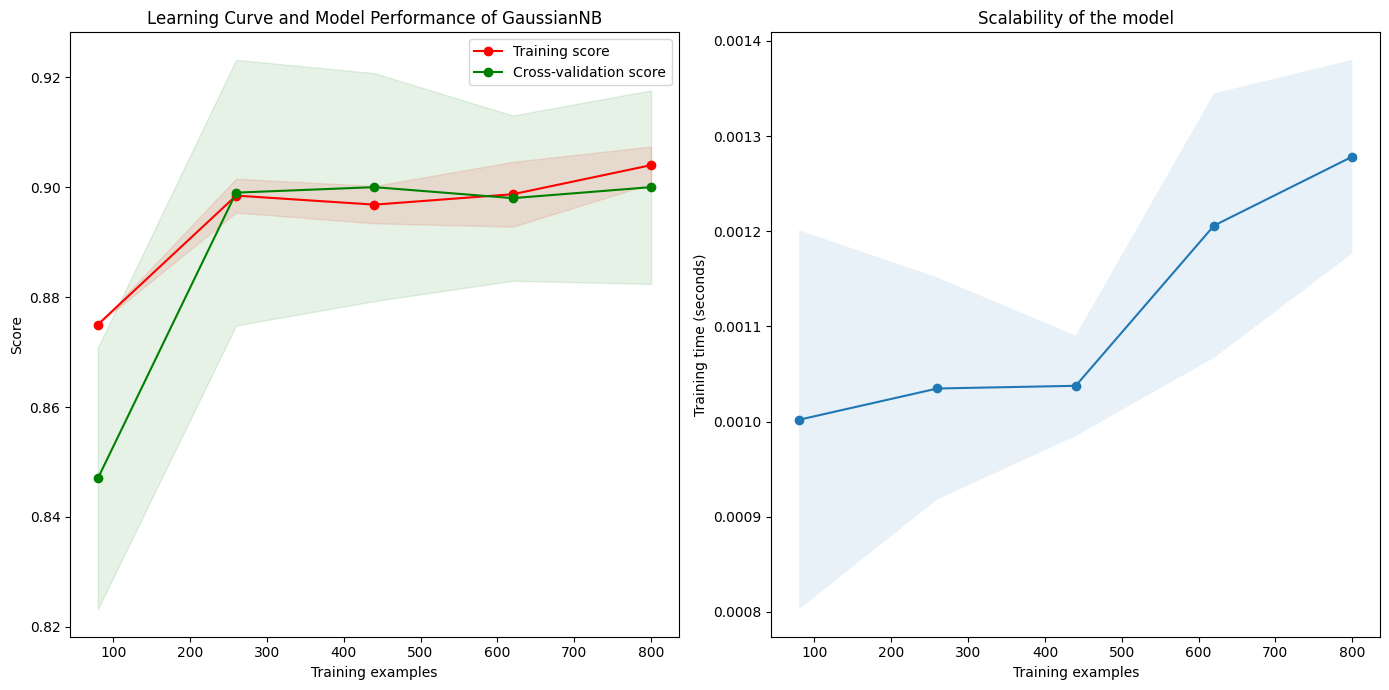

In [67]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Générer des données de classification synthétiques comme exemple
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Créer une instance du modèle Gaussian Naive Bayes
model = GaussianNB()

# Configuration de la learning curve
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5,
    scoring='accuracy', return_times=True)

# Calcul des moyennes et des écarts types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calcul des moyennes et des écarts types des temps de fit
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Fonction pour tracer les résultats
def plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, title):
    plt.figure(figsize=(14, 7))
    plt.subplot(121)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")

    plt.subplot(122)
    plt.plot(train_sizes, fit_times_mean, 'o-')
    plt.fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    plt.title("Scalability of the model")
    plt.xlabel("Training examples")
    plt.ylabel("Training time (seconds)")

    plt.tight_layout()
    plt.show()

# Appeler la fonction d'affichage
plot_training(train_sizes, train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, fit_times_mean, fit_times_std, 'Learning Curve and Model Performance of GaussianNB')